In [1]:
import cv2 as cv
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import copy
import numpy as np

In [2]:
print(cv.__version__)

4.0.0


In [3]:
img = cv.imread("C:\\Users\\Jayant\\Pictures\\wallpapers\\page.jpg",cv.IMREAD_GRAYSCALE)
print(type(img))
print(type(img.shape))


<class 'numpy.ndarray'>
<class 'tuple'>


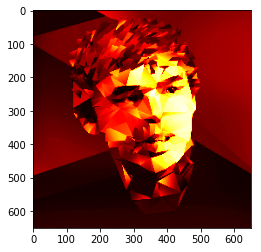

In [4]:
#resizing an image
resized= cv.resize(img, (250,250))
# cv2.imshow("Larry Page", resized)
# cv2.waitKey(0)
lum_img = img[:,:]
#imgplot = plt.imshow(resized,cmap="hot")
#resizing the already resized image
resized_2=cv.resize(resized, (650,650))
imgplot = plt.imshow(resized_2,cmap="hot")

In [4]:
def get_train_names():
    '''
    Reads train.txt file from dataset folder and creates a list with all lines in train.txt file.
    The lines in train.txt contain ids for each individual folder containing respective frames.
    '''
    f = open("../dataset/train.txt", "r")
    train_names=f.read().splitlines()
    print(len(train_names))
    return train_names



def get_test_names(): 
    '''
    Reads test.txt file from dataset folder and creates a list with all lines in train.txt file.
    The lines in train.txt contain ids for each individual folder containing respective frames.
    '''
    f = open("../dataset/test.txt", "r")
    test_names=f.read().splitlines()
    print(len(test_names))
    return test_names

train_names=get_train_names()
test_names=get_test_names()

211
114


In [5]:
def data_video_dictionary(train_names): 
    """
    creates a dictionary of dictionary with following structure
    dict_videos --> key = train filename , value = dict_image --> key = frame no. of images, value = image of celia
    ie first dictonary size is 211 and every dictionary inside 211 dictionaries have size 100. 
    And dictionaries with size 100 contain the images by frames. 
    """
    length=0 # to check the length of total dataset
    dict_videos= {}
    for name in train_names: 
        dict_images={}    
        for i in range(len(os.listdir("../dataset/data/"+name))): 
            dict_images[str(i)]= cv.imread("../dataset/data/"+name+"/frame00"+"{:02d}".format(i)+".png",cv.IMREAD_GRAYSCALE)
            
        length=length+len(dict_images)
        dict_videos[name]=dict_images
    #what I am doing here is error checking, can do this professionally also..do it after experiments..
    print("Length of total dataset, should be 21100 :"+ str(length))    
    return dict_videos

#dict_videos_train =data_video_dictionary(train_names)
dict_videos_test =data_video_dictionary(test_names)

Length of total dataset, should be 21100 :11400


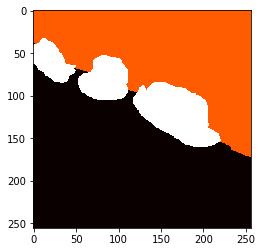

In [6]:
def get_mask_dictionary(train_names): 
    """
    creates a dictionary of masks with key as train_name and value as the image ie the mask. 
    """
    masks={}
    for name in train_names:
        masks[name]=cv.imread("../dataset/masks/"+name+".png",cv.IMREAD_GRAYSCALE)
        
    return masks

mask=get_mask_dictionary(train_names)
imgplot = plt.imshow(mask[train_names[0]],cmap="hot")

In [ ]:
def operation_on_images(dict_videos,train_names,image_name="frame00"): 
    result={}
    for name in train_names:
        dict_image= dict_videos[name]
        for i in range(len(dict_image)): 
            image=dict_image[str(i)]
            #print(str(i)+":"+str(type(dict_image[str(i)])))
            #how can an abstraction be created such that I can name things based on result here using
            #just above generic methods?
        #result action.     
    return result
operation_on_images(dict_videos_train,train_names)

In [7]:
len(dict_videos_train)
len(dict_videos_train[train_names[0]])

NameError: name 'dict_videos_train' is not defined

In [ ]:
#find shortest x and y for images in dataset? 
#can resize to a generic normal dimension also.. but lets try this first.

def operation_on_images_smallest_dimensions(dict_videos,train_names): 
    x=10000
    y=10000
    for name in train_names:
        dict_image= dict_videos[name]
        for i in range(len(dict_image)): 
            image_name= str(i)
            image=dict_image[image_name]
            image_dimension=image.shape
            if image_dimension[0]<x : 
                x=image_dimension[0]
            if image_dimension[1]<y : 
                y=image_dimension[0]
        #result action.     
    return [x,y]


In [ ]:
list_xy= operation_on_images_smallest_dimensions(dict_videos,train_names)
print("smallest dimensions are, for x="+str(list_xy[0])+" and for y="+str(list_xy[1]))

In [ ]:
#resizing every image to 128*128 

def operation_on_images_resizing(dict_videos,train_names,dimensions=[128,128]): 
    dict_videos_resized = copy.deepcopy(dict_videos)
    for name in train_names:
        dict_image= dict_videos_resized[name]
        for i in range(len(dict_image)): 
            image_name= str(i)
            image=dict_image[image_name]
            new_image=cv2.resize(image, (128,128)) #this hard coded value need to be met with x and y results. 
            dict_image[image_name]=new_image
        #result action.     
    return dict_videos_resized

dict_videos_resized= operation_on_images_resizing(dict_videos_train,train_names)
#takes 5 minutes to run 

In [ ]:
print(dict_videos_resized['4bad52d5ef5f68e87523ba40aa870494a63c318da7ec7609e486e62f7f7a25e8'][str(int(0))].shape)

In [ ]:
#image operations are taking damn too long!! the resizing especially!!
#next step is fluctuation variation
#play with image gradients,
#play with adding frame images and doing something with them 
# then create pipeline to train on unet
# then create pipeline to train on some other model which is readily available..

In [ ]:
#testing a few things 
#https://stackoverflow.com/questions/17291455/how-to-get-an-average-picture-from-100-pictures-using-pil
imarr=np.array(img,dtype=np.float)
imgplot = plt.imshow(imarr,cmap="hot")

In [9]:
# fluctuation variation :  my intuition is that , on all pixels in 100 images.. we have 128*128 distributions 
#and we can calculate variance in every pixel of all 100 frames and use that to predict labels first ??
# can define variance_on_images_with_same dimension and also on variable dimensions ie without resizing..
def variance_on_images_resized(dict_videos,train_names,dimensions=(128,128),hop=1,scale=1): 
    dict_videos_mean={}
    dict_videos_variance={}
    for name in train_names:
        dict_image= dict_videos[name]
        arr=np.zeros(dimensions,np.float)
        N_1=len(list(range(0,len(dict_image),hop)))
        N_2=len(list(range(0,len(dict_image))))
        #calculating mean of an image. 
        for i in range(0,len(dict_image),hop): 
            image=dict_image[str(i)]
            imarr=np.array(image,dtype=np.float)
            arr=arr+imarr/N_1
        image_mean=np.array(np.round(arr),dtype=np.uint8)
        dict_videos_mean[name]=image_mean #for later use, can send as results.
        varr=np.zeros(dimensions,np.float)
        for i in range(0,len(dict_image),hop): 
            #using arr because its an image_mean in float type
            image=dict_image[str(i)]
            imarr=np.array(image,dtype=np.float)
            varr=varr+ (scale*(imarr-arr)**2)/N_1
        variance_image =np.array(np.round(varr),dtype=np.uint8)
        dict_videos_variance[name]=variance_image
        #calculating square of X-mean
        #result action.     
    return dict_videos_mean,dict_videos_variance
#hop of 15 is used because Ciliary motion does 5-6 oscillations in 1 frame..so, 15*6 will capture those oscillations
dict_videos_mean,dict_videos_variance=variance_on_images_resized(dict_videos_resized,train_names,hop=7)

NameError: name 'dict_videos_resized' is not defined

In [8]:
def variance_on_images_original(dict_videos,train_names,hop=1,scale=1): 
    dict_videos_mean={}
    dict_videos_variance={}
    for name in train_names:
        dict_image= dict_videos[name]
        arr=np.zeros(dict_image[str(0)].shape,np.float)
        N_1=len(list(range(0,len(dict_image),hop)))
        N_2=len(list(range(0,len(dict_image))))
        #calculating mean of an image. 
        for i in range(0,len(dict_image),hop): 
            image=dict_image[str(i)]
            imarr=np.array(image,dtype=np.float)
            arr=arr+imarr/N_1
        image_mean=np.array(np.round(arr),dtype=np.uint8)
        dict_videos_mean[name]=image_mean #for later use, can send as results.
        varr=np.zeros(dict_image[str(0)].shape,np.float)
        for i in range(0,len(dict_image),hop): 
            #using arr because its an image_mean in float type
            image=dict_image[str(i)]
            imarr=np.array(image,dtype=np.float)
            varr=varr+ (scale*(imarr-arr)**2)/N_1
        variance_image =np.array(np.round(varr),dtype=np.uint8)
        dict_videos_variance[name]=variance_image
        #calculating square of X-mean
        #result action.     
    return dict_videos_mean,dict_videos_variance
#hop of 15 is used because Ciliary motion does 5-6 oscillations in 1 frame..so, 15*6 will capture those oscillations
dict_videos_mean,dict_videos_variance=variance_on_images_original(dict_videos_test,test_names,hop=4,scale=2)

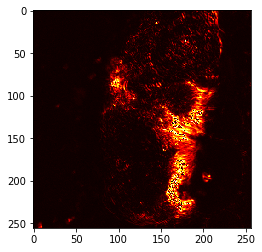

In [31]:
imgplot = plt.imshow(dict_videos_variance[test_names[50]],cmap="hot")
# best to input in a CNN if possible is hop=4, scale =2 variation...

In [ ]:
#the above method..how to threshold?? and create masks??
#important thresholding link :-https://docs.opencv.org/3.4/d7/d4d/tutorial_py_thresholding.html
trainer=train_names[0]
threshold=20 #another parameter to tune now..
image_meaned=dict_videos_mean[trainer]

image_variance=dict_videos_variance[trainer]

ret,thresh1 = cv.threshold(image_variance,threshold,255,cv.THRESH_BINARY)

th3 = cv.adaptiveThreshold(image_variance,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,cv.THRESH_BINARY,11,2)

ret3,th4 = cv.threshold(image_variance,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

blur = cv.GaussianBlur(image_variance,(5,5),255)
ret3,th5 = cv.threshold(blur,threshold,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

images=[image_meaned,image_variance,thresh1,th3,th4,th5]
titles = ['Mean Image','Variance Image','Global Thresholding (v=10)',
          'adaptive gaussian thresholding',"Otsu's Thresholding","Otsu's Thresholding with gaussian filtering"]
f, axarr = plt.subplots(2,3)
axarr[0,0].imshow(images[0])
axarr[0,1].imshow(images[1])
axarr[0,2].imshow(images[2])
axarr[1,0].imshow(images[3])
axarr[1,1].imshow(images[4])
axarr[1,2].imshow(images[5])


In [ ]:
#lets threshold and create masks from it and compare with a train_set accuracy.. and then if its better than 25% ,
#do the same for test. and then do unet.. 

In [44]:
def thresold_variance(dict_videos_variance):
    dict_threshold={}
    for name in test_names: 
        blur = cv.GaussianBlur(dict_videos_variance[name],(5,5),0)
        ret3,th5 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
        dict_threshold[name]= th5
    return dict_threshold

def create_masks(dict_threshold): 
    masks={}
    for name in test_names: 
        res,masks[name]= cv.threshold(dict_threshold[name],3,2,cv.THRESH_BINARY)   
    return masks

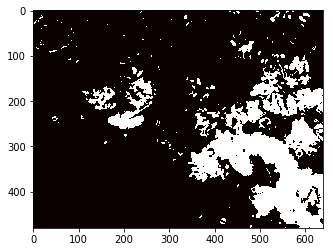

In [45]:
masks=create_masks(thresold_variance(dict_videos_variance))
imgplot = plt.imshow(masks[test_names[50]],cmap="hot")

In [46]:
#create masks.pngs for variance...
def write_masks(masks,test_names): 
    result =0
    for name in test_names: 
        if not os.path.exists('../dataset/test_masks'):
            os.makedirs('../dataset/test_masks')
        cv.imwrite("../dataset/test_masks/"+name+".png",masks[name])
        result=result+1
    return result
write_masks(masks,test_names)
#getting zero, doing something wrong 

114

In [11]:
import tarfile

def make_tarfile(output_filename='p2sub.tar', source_dir='../dataset/test_masks'):
    with tarfile.open(output_filename, "w:gz") as tar:
        tar.add(source_dir, arcname=os.path.basename(source_dir))
        tar.close()
        
make_tarfile()        

In [ ]:
#go to next step now!!!

